## 欠損データへの対処

In [24]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
    1.0,2.0,3.0,4.0
    5.0,6.0,,8.0
    10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [8]:
df.isnull().sum()

A     0
 B    0
 C    1
 D    1
dtype: int64

## 欠損値を持つサンプル/取り除く

- 欠損値を含む行を削除

In [9]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


- 欠損値を含む列を削除

In [10]:
df.dropna(axis = 1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


- 全ての列がNaNである行だけを削除

In [12]:
df.dropna(how = 'all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


- NaN値が4つ未満の行を削除

In [13]:
df.dropna(thresh = 4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


- 特定の列にNaNが含まれている行だけを削除

In [25]:
df.dropna(subset = ['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


## 欠損値を補完する
- 平均値補完（欠損値を特徴量の列全体の平均値と置き換える）

In [30]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imr = imr.fit(df)

imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

## カテゴリデータの処理

In [33]:
import pandas as pd

df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### 順序特徴量のマッピング

In [34]:
# Tシャツのサイズと整数を対応させるディクショナリを生成
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


### クラスラベルのエンコーディング

In [38]:
import numpy as np

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [42]:
for a, b in enumerate(np.unique(df['classlabel'])):
    print(a, b)

0 class1
1 class2


In [43]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


- 元の文字列に戻す場合

In [45]:
# inv_class_mapping = {v: k for k, v in class_mapping.items()}
# df['classlabel']  = df['classlabel'].map(inv_class_mapping)
# df

### Label Encoderクラスを使用する方法

In [48]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

## 名義特徴量での one - hot エンコーディング

In [50]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

以下のようにエンコーディングされる
- blue -> 0
- green -> 1
- red -> 2

色には大小はないが，学習アルゴリズムが生成する結果に影響を与えるかもしれない  
そこで one - hot エンコーディング

In [52]:
from sklearn.preprocessing import OneHotEncoder

# categorical_features引数で変換する変数の列位置をリストで定義
ohe = OneHotEncoder(categorical_features = [0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [54]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


## データセットの分割

In [1]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 特徴量の尺度を揃える

- 正規化（normalization）

In [3]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train_norm = mms.fit_transform(X_train)
x_test_norm = mms.transform(X_test)

- 標準化（standardization）

In [4]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

## 正則化

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l1', C = 0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_train_std, y_train))
print('Test accuracy: ', lr.score(X_test_std, y_test))

Training accuracy:  0.983870967742
Test accuracy:  0.981481481481


- 切片の表示

In [69]:
lr.intercept_

array([-0.38383563, -0.15809042, -0.70047719])

- 重み係数の表示

In [70]:
lr.coef_

array([[ 0.2802727 ,  0.        ,  0.        , -0.02803855,  0.        ,
         0.        ,  0.71008142,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23594184],
       [-0.64395465, -0.06877907, -0.05720484,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92688852,
         0.06012094,  0.        , -0.37105991],
       [ 0.        ,  0.06156513,  0.        ,  0.        ,  0.        ,
         0.        , -0.63555641,  0.        ,  0.        ,  0.4978631 ,
        -0.35832541, -0.57159215,  0.        ]])

$z = w_1 x_1 + w_2 x_2 + \cdots + w_m x_m + b$

### 正則化パスのグラフ化

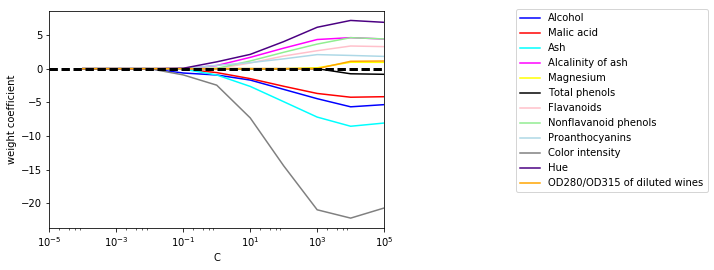

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty = 'l1', C = 10 ** c, random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10 ** c)
    
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label = df_wine.columns[column + 1], color = color)

plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
plt.xlim([10 ** (-5), 10 **5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc = 'upper left')
ax.legend(loc = 'upper left', bbox_to_anchor = (1.38, 1.03), ncol = 1, fancybox = True)
plt.show()

### SBSの実装

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import sbs

knn = KNeighborsClassifier(n_neighbors = 2)
sbs = sbs.SBS(knn, k_features = 1)
sbs.fit(X_train_std, y_train)

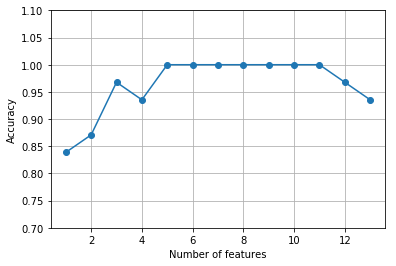

In [8]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [17]:
# sbs.subsets_ : 有効な列
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [10]:
knn.fit(X_train_std, y_train)
print('Training accuracy: ', knn.score(X_train_std, y_train))
print('Test accuracy: ', knn.score(X_test_std, y_test))

Training accuracy:  0.983870967742
Test accuracy:  0.944444444444


In [18]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy: ', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy: ', knn.score(X_test_std[:, k5], y_test))

Training accuracy:  0.959677419355
Test accuracy:  0.925925925926


## ランダムフォレストで特徴量の重要度にアクセス

In [22]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

In [21]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


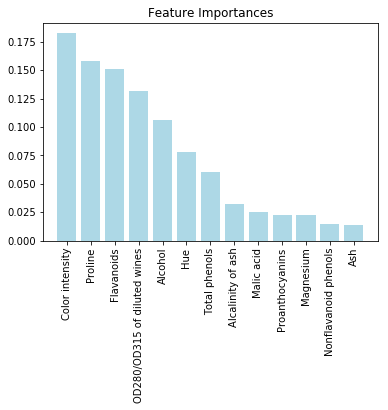

In [23]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color = 'lightblue', align = 'center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

- 重要度が0.15以上の特徴量を抽出

In [ ]:
X_selected = forest.transform(X_train, threshold = 0.15)
X_selected.shape